#SPRINT 2 TEAM ID:PNT2022TMID01504

#Importing required Libraries

In [1]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [2]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras


In [4]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#Loading dataset

Dataset is available in tensorflow dataset repository

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Training Dataset has 60000 images & testing has 10000 images

In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


#  Analyze the data

In [8]:

x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[3]

1

In [10]:
import matplotlib.pyplot as plt

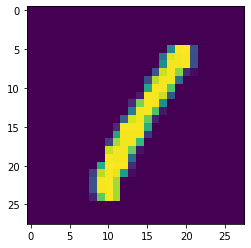

In [11]:
plt.imshow(x_train[3])

#Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [12]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

#Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Add CNN Layers

In [15]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

#Compiling the model

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Train the model

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
 280/1875 [===>..........................] - ETA: 3:06 - loss: 0.7711 - accuracy: 0.8969

#Observing the Metrics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

#Test the model

In [ ]:
prediction=model.predict(x_test[:5])
print(prediction)

In [ ]:
import numpy as np

In [ ]:
print(np.argmax(prediction,axis=1))

In [ ]:
print(y_test[:5])

#Save the Model

In [ ]:
model.save('models/mnistcnn.h5')

#Test the saved model

inputs loaded from mnist

In [ ]:

print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

ouput predicted from saved model

inputs as hown are 5,0,4,1,9,2,1,3,1

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=X_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))